## PORTICO N NIVELES
*Ejemplo de aplicacion para varios grados de libertad*

In [1]:
from PyStructMatrix import StructuralMatrixAnalysis, StructuralPlotter
import numpy as np

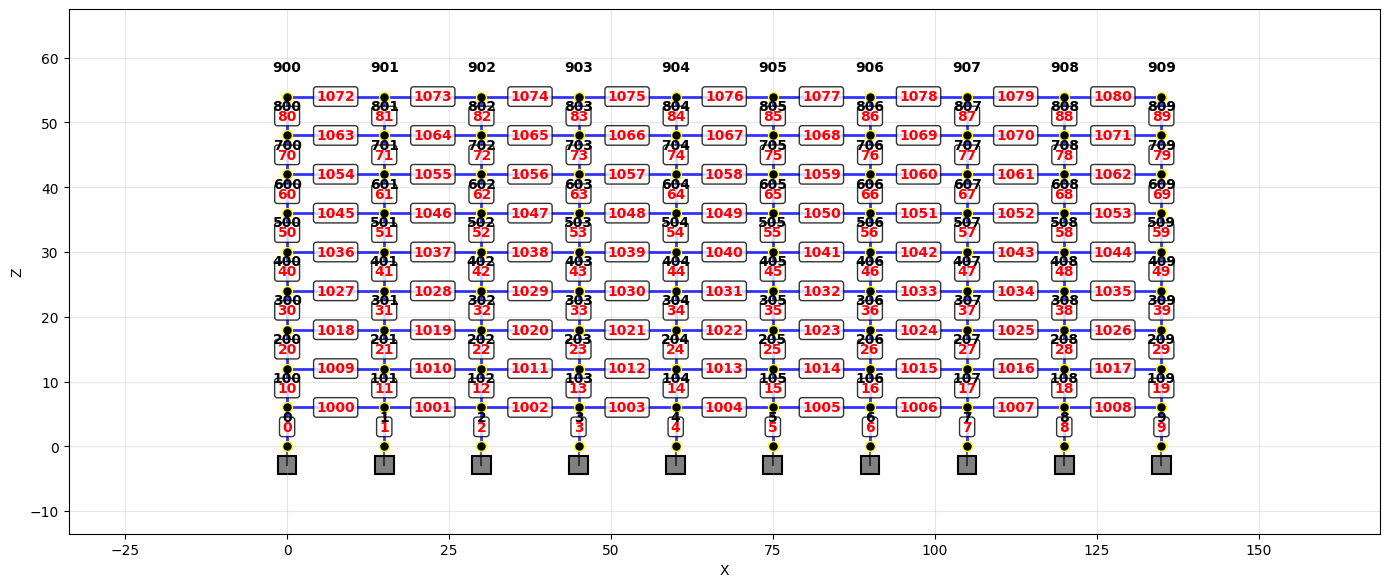

In [2]:
# ==========================================================
# MODELO DE PÓRTICO DE ACERO 2D MEDIANTE ANÁLISIS MATRICIAL
# ==========================================================

# ----------------------------------------------------------
# 1. CREACIÓN DEL SISTEMA ESTRUCTURAL Y PLOTTER
# ----------------------------------------------------------
# Se instancia el sistema de análisis estructural y el
# objeto encargado de la visualización gráfica
system = StructuralMatrixAnalysis()
plotter = StructuralPlotter(system)


# ----------------------------------------------------------
# 2. DEFINICIÓN DE UNIDADES
# ----------------------------------------------------------
# Sistema base: metros (m), kilonewtons (kN)
m = 1
kN = 1
kPa = kN / m**2

# Unidades auxiliares
cm = m * 1e-2
IN = 2.54 * cm           # pulgada
N = kN * 1e-3
GPa = kPa * 1e6

# Peso específico del acero (aprox.)
pa = 78.5 * kN / m**3


# ----------------------------------------------------------
# 3. GEOMETRÍA DEL PÓRTICO
# ----------------------------------------------------------
H = 6 * m                # altura de piso
Lx = 15 * m              # luz entre columnas
Ncolumnas = 10           # número de columnas
Npisos = 10               # número de niveles

# Carga distribuida en vigas (sobrecarga + peso propio losa)
w = (3.6 * kPa + 4 * kPa) * Lx


# ----------------------------------------------------------
# 4. PROPIEDADES DEL MATERIAL
# ----------------------------------------------------------
E = 200 * GPa             # módulo de elasticidad del acero


# ----------------------------------------------------------
# 5. PROPIEDADES DE SECCIÓN
# ----------------------------------------------------------
# Columnas: perfil W14x132
Ac = 38.8 * IN**2
Ic = 1530 * IN**4

# Vigas: perfil W18x86
Av = 25.3 * IN**2
Iv = 1530 * IN**4


# ----------------------------------------------------------
# 6. DEFINICIÓN DE NODOS
# ----------------------------------------------------------
# Se generan los nodos del pórtico piso por piso
# El ID del nodo se define como: i*100 + j
for i in range(Npisos):
    for j in range(Ncolumnas):
        system.defineNode(
            i * 100 + j,   # ID único del nodo
            x=j * Lx,      # coordenada horizontal
            z=i * H        # coordenada vertical
        )


# ----------------------------------------------------------
# 7. DEFINICIÓN DE COLUMNAS
# ----------------------------------------------------------
# Elementos verticales que conectan pisos consecutivos
kcol = 0
for i in range(Npisos - 1):
    for j in range(Ncolumnas):
        system.defineElement(
            kcol,
            Ni=i * 100 + j,
            Nj=(i + 1) * 100 + j,
            A=Ac,
            I=Ic,
            E=E,
            weight=pa
        )
        kcol += 1


# ----------------------------------------------------------
# 8. DEFINICIÓN DE VIGAS
# ----------------------------------------------------------
# Elementos horizontales entre columnas en cada nivel
kviga = 1000
for i in range(1, Npisos):
    for j in range(Ncolumnas - 1):
        system.defineElement(
            kviga,
            Ni=i * 100 + j,
            Nj=i * 100 + j + 1,
            A=Av,
            I=Iv,
            E=E,
            weight=pa
        )

        # Aplicación de carga uniformemente distribuida
        system.assignElement.uniformLoad(kviga, w=w)
        kviga += 1


# ----------------------------------------------------------
# 9. RESTRICCIONES EN APOYOS
# ----------------------------------------------------------
# Se empotran todos los nodos de la base
for i in range(Ncolumnas):
    system.assignJoint.restrictions(
        i,
        ux=True,   # desplazamiento horizontal restringido
        uz=True,   # desplazamiento vertical restringido
        ry=True    # rotación restringida
    )


# ----------------------------------------------------------
# 10. VISUALIZACIÓN DE LA GEOMETRÍA DEL PÓRTICO
# ----------------------------------------------------------
plotter.showFrame()


In [3]:
# Ejecución del Análisis Matricial
system.RunCompleteAnalysis(show_process=False)

ANÁLISIS COMPLETADO EXITOSAMENTE


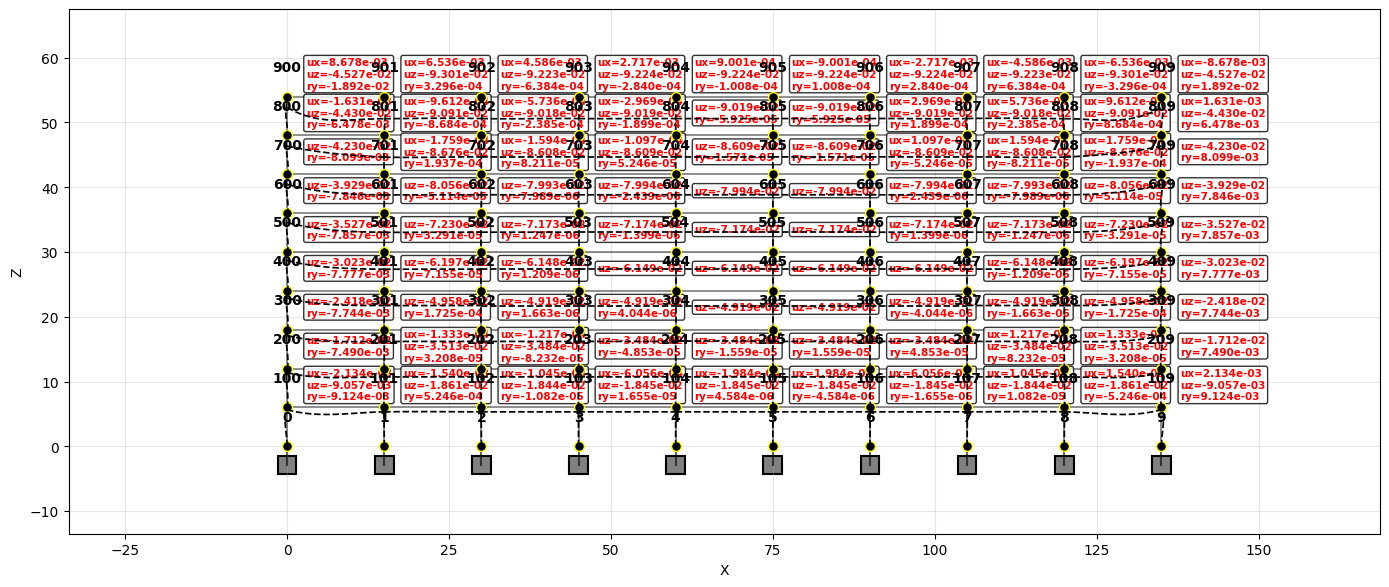

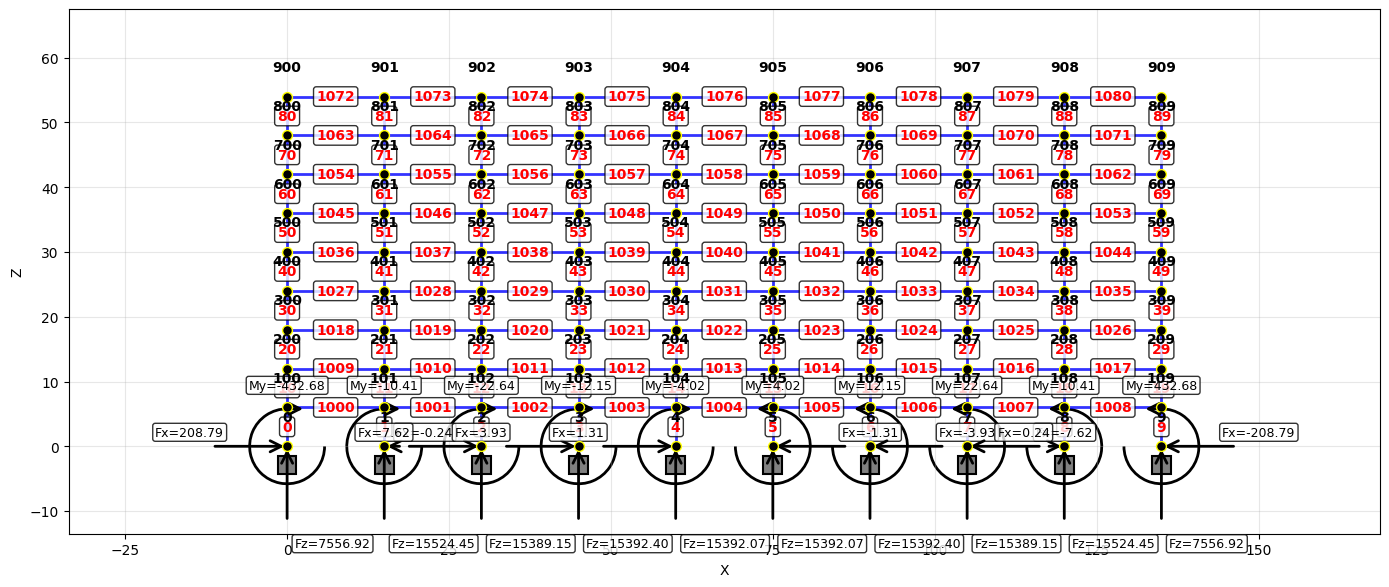

In [4]:
# Visualización de Resultados
plotter.showDeformedShape(escala=0.05)
plotter.showReactions()

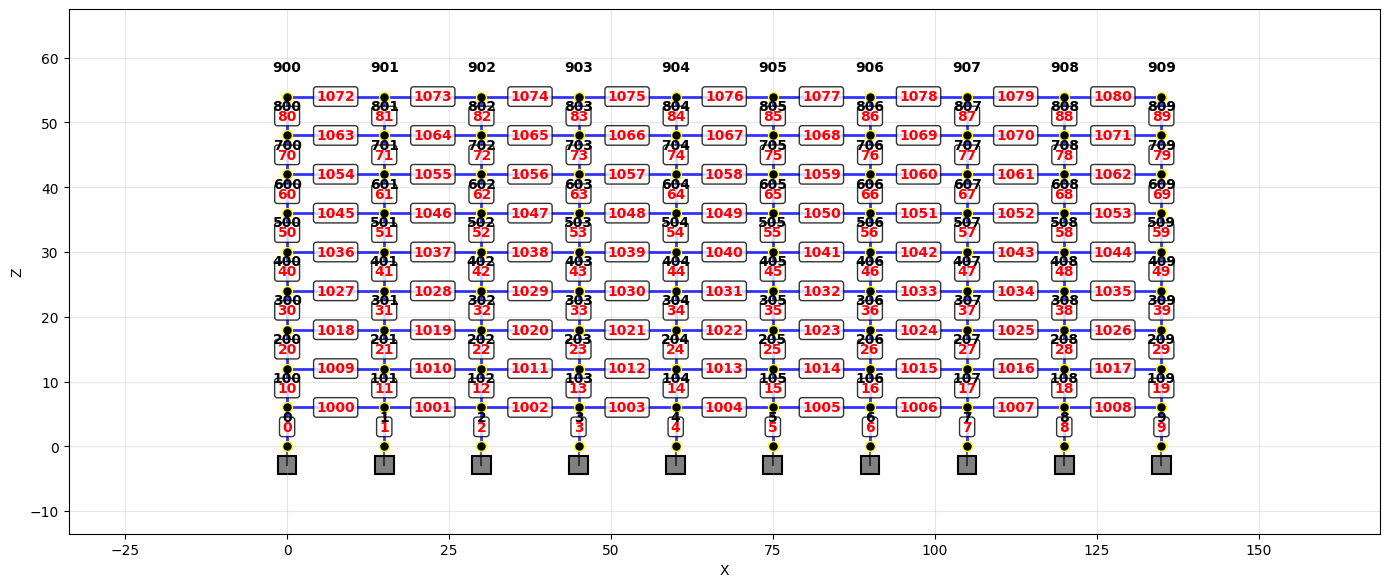

In [5]:
# Modelo con fuerza lateral
system = StructuralMatrixAnalysis()
plotter = StructuralPlotter(system)

for i in range(Npisos):
    for j in range(Ncolumnas):
        system.defineNode(i*100+j, x=j*Lx, z=i*H)

kcol = 0
for i in range(Npisos-1):
    for j in range(Ncolumnas):
        system.defineElement(kcol, Ni=i*100+j, Nj=(i+1)*100+j, A=Ac, I=Ic, E=E, weight=pa)
        kcol += 1

kviga = 1000
for i in range(1, Npisos):
    for j in range(Ncolumnas-1):
        system.defineElement(kviga, Ni=i*100+j, Nj=i*100+j+1, A=Av, I=Iv, E=E, weight=pa)
        system.assignElement.uniformLoad(kviga, w=w)
        kviga += 1

for i in range(Ncolumnas):
    system.assignJoint.restrictions(i, ux=True, uz=True, ry=True)

h_acum=Npisos*(Npisos+1)*H
Plat = [H*(i+1)/h_acum*w*Lx*(Ncolumnas-1) for i in range(Npisos-1)]

kcol = 0
for i in range(1, Npisos):
    system.assignJoint.force(i*100, fx=Plat[i-1])

# Visualización Inicial
plotter.showFrame()

In [6]:
# Ejecución del Análisis Matricial
system.RunCompleteAnalysis(show_process=False)

ANÁLISIS COMPLETADO EXITOSAMENTE


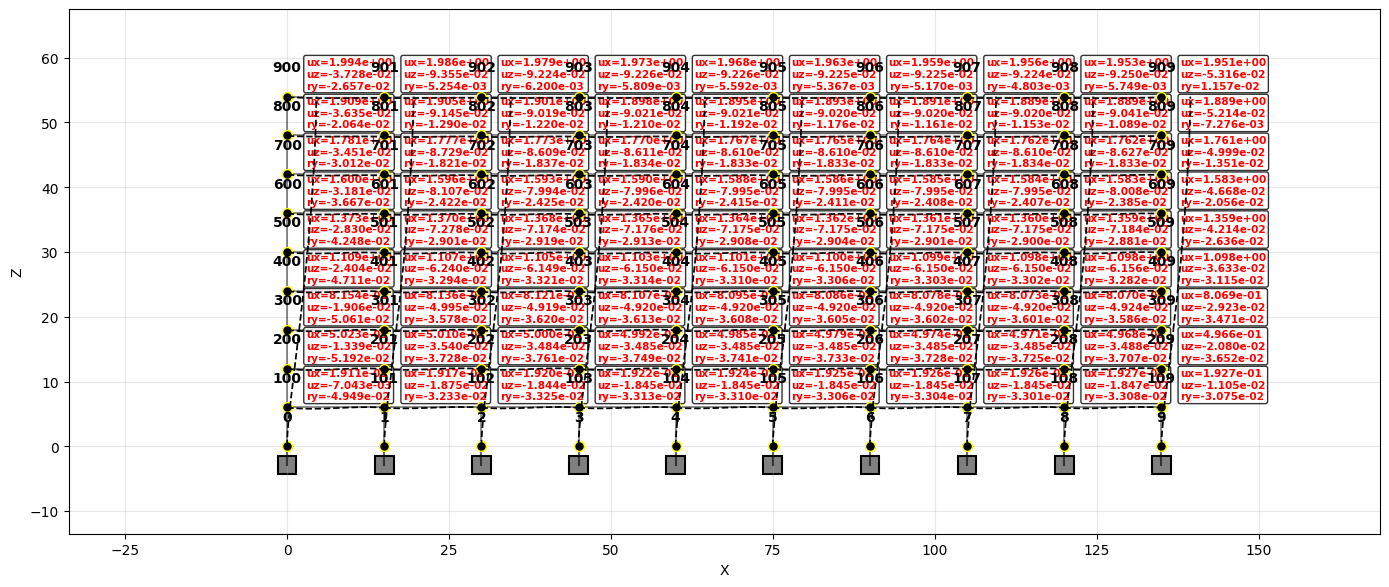

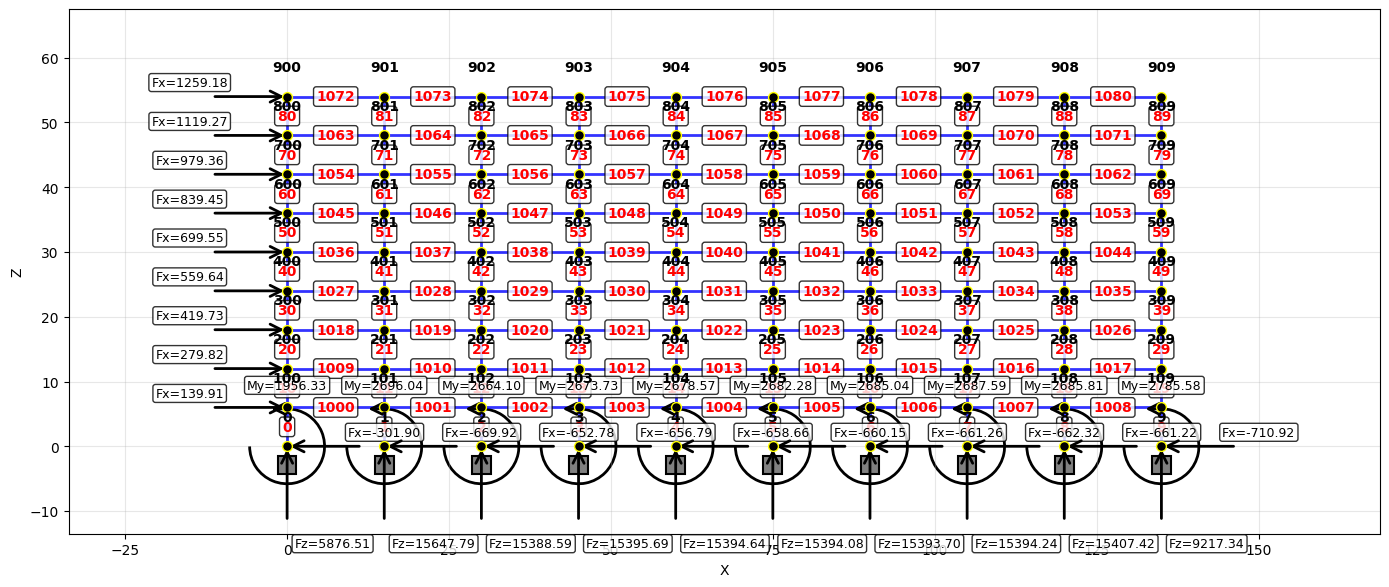

In [7]:
# Visualización de Resultados
plotter.showDeformedShape(escala=0.01)
plotter.showReactions()